**1. Load Required Libraries**

In [ ]:
%pylab inline
import seaborn as sns
import pandas as pd
import numpy as np
import math
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import warnings
import requests
from scipy.stats import pearsonr
warnings.simplefilter('ignore')
from matplotlib import pyplot as plt

**2. Upload and view data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/team.csv",
                 usecols=['team_id','rank', 'g','w', 'l', 'r', 'ab','h','bb', 'so', 'sb','ra', 'er','sho', 'sv', 'ipouts', 'ha','soa', 'e'])
df


,team_id,rank,g,w,l,r,ab,h,bb,so,sb,ra,er,sho,sv,ipouts,ha,soa,e
0,BS1,3,31,20,10,401,1372,426,60,19.0,73.0,303,109,1,3,828,367,23,225
1,CH1,2,28,19,9,302,1196,323,60,22.0,69.0,241,77,0,1,753,308,22,218
2,CL1,8,29,10,19,249,1186,328,26,25.0,18.0,341,116,0,0,762,346,34,223
3,FW1,7,19,7,12,137,746,178,33,9.0,16.0,243,97,1,0,507,261,17,163
4,NY2,5,33,16,17,302,1404,403,33,15.0,46.0,313,121,1,0,879,373,22,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,LAN,1,162,92,70,667,5385,1346,563,1258.0,59.0,595,553,21,47,4337,1317,1396,75
2801,SFN,2,162,84,78,696,5565,1486,457,1159.0,93.0,627,597,18,41,4333,1344,1165,78
2802,ARI,3,162,79,83,720,5649,1494,490,1312.0,132.0,713,659,12,44,4400,1450,1215,86
2803,SDN,4,162,74,88,650,5457,1324,426,1327.0,82.0,731,655,6,41,4321,1371,1393,92


# Data Dictionary - (With a few impostors!)
2.8  Teams table

* yearID         Year
* lgID           League
* teamID         Team
* franchID       Franchise (links to TeamsFranchise table)
* divID          Team's division
* Rank           Position in final standings
* G              Games played
* GHome          Games played at home
* W              Wins
* L              Losses
* DivWin         Division Winner (Y or N)
* WCWin          Wild Card Winner (Y or N)
* LgWin          League Champion(Y or N)
* WSWin          World Series Winner (Y or N)
* R              Runs scored
* AB             At bats
* H              Hits by batters
* 2B             Doubles
* 3B             Triples
* HR             Homeruns by batters
* BB             Walks by batters
* SO             Strikeouts by batters
* SB             Stolen bases
* CS             Caught stealing
* HBP            Batters hit by pitch
* SF             Sacrifice flies
* RA             Opponents runs scored
* ER             Earned runs allowed
* ERA            Earned run average
* CG             Complete games
* SHO            Shutouts
* SV             Saves
* IPOuts         Outs Pitched (innings pitched x 3)
* HA             Hits allowed
* HRA            Homeruns allowed
* BBA            Walks allowed
* SOA            Strikeouts by pitchers
* E              Errors
* DP             Double Plays
* FP             Fielding  percentage
* name           Team's full name
* park           Name of team's home ballpark
* attendance     Home attendance total
* BPF            Three-year park factor for batters
* PPF            Three-year park factor for pitchers
* teamIDBR       Team ID used by Baseball Reference website
* teamIDlahman45 Team ID used in Lahman database version 4.5
* teamIDretro    Team ID used by Retrosheet

**Check and see if the dataframe loaded correctly**

In [ ]:
# Examine the dataframe to see if it loaded correctly
df.head()

,team_id,rank,g,w,l,r,ab,h,bb,so,sb,ra,er,sho,sv,ipouts,ha,soa,e
0,BS1,3,31,20,10,401,1372,426,60,19.0,73.0,303,109,1,3,828,367,23,225
1,CH1,2,28,19,9,302,1196,323,60,22.0,69.0,241,77,0,1,753,308,22,218
2,CL1,8,29,10,19,249,1186,328,26,25.0,18.0,341,116,0,0,762,346,34,223
3,FW1,7,19,7,12,137,746,178,33,9.0,16.0,243,97,1,0,507,261,17,163
4,NY2,5,33,16,17,302,1404,403,33,15.0,46.0,313,121,1,0,879,373,22,227


**Examine the data types of the dataframe**

In [ ]:
df.shape

(2805, 19)

In [ ]:
df.dtypes

team_id     object
rank         int64
g            int64
w            int64
l            int64
r            int64
ab           int64
h            int64
bb           int64
so         float64
sb         float64
ra           int64
er           int64
sho          int64
sv           int64
ipouts       int64
ha           int64
soa          int64
e            int64
dtype: object

**Examine the shape of the dataframe. How many rows are there in this dataframe?**

In [ ]:
# Examine the shape of the dataframe
df.shape

(2805, 19)

**3. Clean and transform data**

**Convert team_id into a category**

In [ ]:
# Examine unique values for team

df['team_id'].unique()

array(['BS1', 'CH1', 'CL1', 'FW1', 'NY2', 'PH1', 'RC1', 'TRO', 'WS3',
       'BL1', 'BR1', 'BR2', 'MID', 'WS4', 'BL4', 'ELI', 'PH2', 'WS5',
       'CH2', 'HR1', 'KEO', 'NH1', 'PH3', 'SL1', 'SL2', 'WS6', 'BSN',
       'CHN', 'CN1', 'HAR', 'LS1', 'NY3', 'PHN', 'SL3', 'IN1', 'ML2',
       'PRO', 'BFN', 'CL2', 'SR1', 'TRN', 'WOR', 'DTN', 'BL2', 'CN2',
       'LS2', 'PH4', 'PT1', 'SL4', 'CL5', 'NY1', 'NY4', 'PHI', 'ALT',
       'BLU', 'BR3', 'BSU', 'CHU', 'CNU', 'IN2', 'KCU', 'MLU', 'PHU',
       'RIC', 'SLU', 'SPU', 'TL1', 'WIL', 'WS7', 'WSU', 'SL5', 'KCN',
       'WS8', 'CL3', 'IN3', 'PIT', 'KC2', 'CL4', 'CL6', 'BFP', 'BL3',
       'BR4', 'BRO', 'BRP', 'BSP', 'CHP', 'CIN', 'CLP', 'NYP', 'PHP',
       'PTP', 'RC2', 'SR2', 'TL2', 'BS2', 'CN3', 'ML3', 'WS9', 'BLN',
       'LS3', 'SLN', 'WAS', 'BLA', 'BOS', 'CHA', 'CLE', 'DET', 'MLA',
       'PHA', 'WS1', 'SLA', 'NYA', 'BLF', 'BRF', 'BUF', 'CHF', 'IND',
       'KCF', 'PTF', 'SLF', 'NEW', 'ML1', 'BAL', 'KC1', 'LAN', 'SFN',
       'LAA', 'MIN',

In [ ]:
# Coerce team into a category

df['team_id'] = df['team_id'].astype('category')

**Data Post-Processing**

Now we have the following columns: team_id, name  are categorical features.

In [ ]:
df.dtypes

team_id    category
rank          int64
g             int64
w             int64
l             int64
r             int64
ab            int64
h             int64
bb            int64
so          float64
sb          float64
ra            int64
er            int64
sho           int64
sv            int64
ipouts        int64
ha            int64
soa           int64
e             int64
dtype: object

**Examine NaNs in dataframe**

In [ ]:
df.isnull().values.any()

True

In [ ]:
dfs = [df]

for one_df in dfs:
  print(one_df.head(1))
  print(f'{one_df.isna().sum()}\n')

  team_id  rank   g   w   l    r    ab    h  bb    so    sb   ra   er  sho  \
0     BS1     3  31  20  10  401  1372  426  60  19.0  73.0  303  109    1   

   sv  ipouts   ha  soa    e  
0   3     828  367   23  225  
team_id      0
rank         0
g            0
w            0
l            0
r            0
ab           0
h            0
bb           0
so         120
sb         144
ra           0
er           0
sho          0
sv           0
ipouts       0
ha           0
soa          0
e            0
dtype: int64



**Drop all Nan and check again**

In [ ]:
df = df.dropna()
df.isnull().values.any()

False

In [ ]:
df.shape

(2541, 19)

**Number of unique individual identifiers in the dataset**

In [ ]:
print(f'There are {len(pd.unique(df.team_id))} unique individual identifiers in the data')

There are 110 unique individual identifiers in the data


**4. Exploratory Visual and Descriptive Analysis**

**Coveriance Check**

In [ ]:
df.cov()

,rank,g,w,l,r,ab,h,bb,so,sb,ra,er,sho,sv,ipouts,ha,soa,e
rank,5.183789,-5.554012,-27.213468,21.167635,-117.948951,-216.609218,-114.741199,-70.985035,-141.623325,-6.606855,106.173490,50.518325,-4.121874,-14.990776,-196.909441,55.827097,-227.083800,69.396061
g,-5.554012,289.259781,148.974987,144.575381,755.113454,9282.246725,2253.871076,1095.652977,2762.562816,-120.364990,726.986288,1198.520744,25.191309,126.592762,7892.992962,2230.219412,2782.333564,-594.488315
w,-27.213468,148.974987,238.897075,-87.236389,1098.642433,5023.600297,1656.761653,887.238486,1288.487811,32.753380,-406.950874,3.028398,39.299376,110.694115,4318.487601,522.424021,1880.735259,-475.729103
l,21.167635,144.575381,-87.236389,235.110461,-345.355599,4406.991635,630.930156,235.426281,1650.342929,-189.074179,1135.157787,1244.961075,-14.092750,27.274430,3708.375790,1742.873627,1074.758881,-193.268867
r,-117.948951,755.113454,1098.642433,-345.355599,14540.671293,32546.203681,15362.130064,6874.271493,3335.479317,1915.836505,6902.543340,6349.069760,-55.110401,312.730786,19456.933931,9717.663877,5257.779666,787.551489
ab,-216.609218,9282.246725,5023.600297,4406.991635,32546.203681,310447.039894,81649.962866,35828.210975,86151.454466,-4082.965824,28662.602500,42886.188582,656.282825,4070.304595,253638.390061,77029.711904,88047.867956,-18104.842678
h,-114.741199,2253.871076,1656.761653,630.930156,15362.130064,81649.962866,28873.908223,9905.759335,13501.285854,-662.642466,9819.506442,12835.586753,87.378603,873.792699,61048.934811,22986.098947,16296.029921,-4032.513880
bb,-70.985035,1095.652977,887.238486,235.426281,6874.271493,35828.210975,9905.759335,10656.816964,11642.700744,-823.244492,3609.234091,6032.637460,65.488396,652.238215,30181.459125,8655.615256,11913.497674,-3397.727156
so,-141.623325,2762.562816,1288.487811,1650.342929,3335.479317,86151.454466,13501.285854,11642.700744,78911.207284,-3692.614903,5040.050184,16099.950597,167.308282,3507.840110,77586.733378,16049.709169,72661.721591,-15962.953185
sb,-6.606855,-120.364990,32.753380,-189.074179,1915.836505,-4082.965824,-662.642466,-823.244492,-3692.614903,4846.188868,731.819970,-1883.508578,-15.880707,-254.955364,-4108.200402,-1572.992572,-3434.309810,4035.573593


**Correltion Check**

In [ ]:
df.corr()

,rank,g,w,l,r,ab,h,bb,so,sb,ra,er,sho,sv,ipouts,ha,soa,e
rank,1.000000,-0.143430,-0.773312,0.606335,-0.429614,-0.170750,-0.296581,-0.302016,-0.221433,-0.041684,0.384020,0.182319,-0.375781,-0.423783,-0.185207,0.143223,-0.352687,0.327102
g,-0.143430,1.000000,0.566714,0.554389,0.368193,0.979525,0.779888,0.624044,0.578228,-0.101661,0.352001,0.579040,0.307447,0.479080,0.993828,0.765939,0.578484,-0.375121
w,-0.773312,0.566714,1.000000,-0.368092,0.589466,0.583332,0.630815,0.556059,0.296760,0.030440,-0.216820,0.001610,0.527770,0.460959,0.598329,0.197428,0.430278,-0.330314
l,0.606335,0.554389,-0.368092,1.000000,-0.186783,0.515837,0.242154,0.148732,0.383150,-0.177132,0.609652,0.667155,-0.190776,0.114489,0.517918,0.663927,0.247857,-0.135269
r,-0.429614,0.368193,0.589466,-0.186783,1.000000,0.484411,0.749733,0.552231,0.098468,0.228226,0.471388,0.432638,-0.094865,0.166925,0.345538,0.470717,0.154183,0.070090
ab,-0.170750,0.979525,0.583332,0.515837,0.484411,1.000000,0.862401,0.622899,0.550427,-0.105264,0.423627,0.632456,0.244490,0.470193,0.974843,0.807523,0.558794,-0.348717
h,-0.296581,0.779888,0.630815,0.242154,0.749733,0.862401,1.000000,0.564704,0.282848,-0.056018,0.475881,0.620683,0.106737,0.330978,0.769377,0.790138,0.339122,-0.254680
bb,-0.302016,0.624044,0.556059,0.148732,0.552231,0.622899,0.564704,1.000000,0.401486,-0.114555,0.287914,0.480176,0.131678,0.406664,0.626095,0.489750,0.408086,-0.353221
so,-0.221433,0.578228,0.296760,0.383150,0.098468,0.550427,0.282848,0.401486,1.000000,-0.188827,0.147750,0.470936,0.123627,0.803736,0.591469,0.333725,0.914667,-0.609840
sb,-0.041684,-0.101661,0.030440,-0.177132,0.228226,-0.105264,-0.056018,-0.114555,-0.188827,1.000000,0.086570,-0.222318,-0.047352,-0.235726,-0.126376,-0.131983,-0.174448,0.622124


In [ ]:
fig = sns.pairplot(df)

Let us explore the relationship between two numeric variables in our dataset. The Total Game vs. Wining of a Team.

Text(0.5, 1.02, 'Earned run average vs. Opponents runs scored')

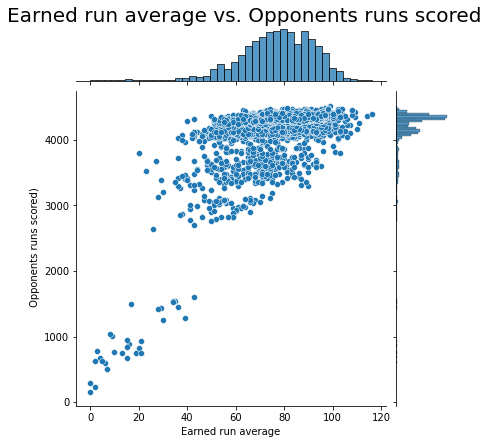

In [ ]:
joint = sns.jointplot(x = 'w', y = 'ipouts', data = df)
joint.set_axis_labels(xlabel = 'Earned run average', ylabel = ' Opponents runs scored)')
joint.fig.suptitle('Earned run average vs. Opponents runs scored', fontsize = 20, y = 1.02)

In [ ]:
df['w'].cov(df['r'])

1098.6424327640862

In [ ]:
df['w'].corr(df['r'])

0.5894659503496954

Text(0.5, 1.02, 'Earned runs allowed vs. Opponents runs scored')

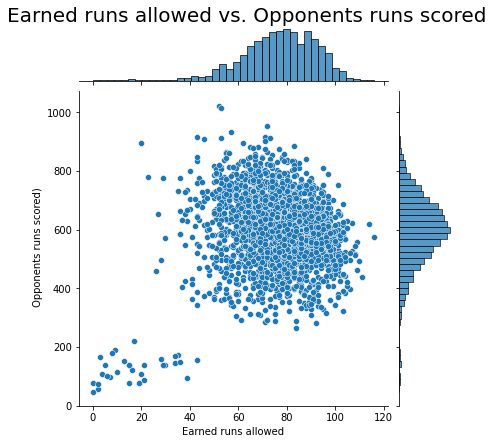

In [ ]:
joint = sns.jointplot(x = 'w', y = 'er', data = df)
joint.set_axis_labels(xlabel = 'Earned runs allowed', ylabel = ' Opponents runs scored)')
joint.fig.suptitle('Earned runs allowed vs. Opponents runs scored', fontsize = 20, y = 1.02)

**Pitching**

In [ ]:
df_team=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/team.csv",
                 usecols=['year','team_id','rank', 'g','w', 'l', 'r'])
df_team=df_team.set_index('team_id')
df_team

,year,rank,g,w,l,r
team_id,,,,,,
BS1,1871,3,31,20,10,401
CH1,1871,2,28,19,9,302
CL1,1871,8,29,10,19,249
FW1,1871,7,19,7,12,137
NY2,1871,5,33,16,17,302
...,...,...,...,...,...,...
LAN,2015,1,162,92,70,667
SFN,2015,2,162,84,78,696
ARI,2015,3,162,79,83,720


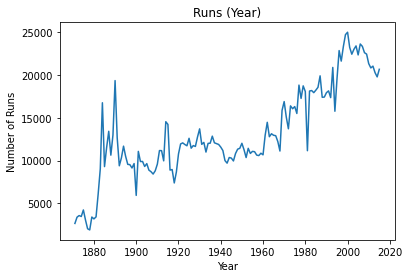

In [ ]:
homeruns = df_team[['year', 'r']].copy()
hr_by_year = homeruns.groupby('year')['r'].sum()
hr_by_year.sort_index()
hr_by_year.plot();
plt.ylabel('Number of Runs')
plt.xlabel('Year')
plt.title('Runs (Year)');

In [ ]:
df_player=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/player.csv",
                 usecols=['player_id','name_given','birth_country','weight', 'height'])
#df_player=df_player.set_index('player_id')
df_player.head()


,player_id,birth_country,name_given,weight,height
0,aardsda01,USA,David Allan,220.0,75.0
1,aaronha01,USA,Henry Louis,180.0,72.0
2,aaronto01,USA,Tommie Lee,190.0,75.0
3,aasedo01,USA,Donald William,190.0,75.0
4,abadan01,USA,Fausto Andres,184.0,73.0


In [ ]:
df_pitching=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/pitching.csv",
                 usecols=['player_id','team_id', 'year','g', 'w', 'l'])
#df_pitching=df_pitching.set_index('player_id')
df_pitching

,player_id,year,team_id,w,l,g
0,bechtge01,1871,PH1,1,2,3
1,brainas01,1871,WS3,12,15,30
2,fergubo01,1871,NY2,0,0,1
3,fishech01,1871,RC1,4,16,24
4,fleetfr01,1871,NY2,0,1,1
...,...,...,...,...,...,...
44134,youngch03,2015,KCA,11,6,34
44135,zieglbr01,2015,ARI,0,3,66
44136,zimmejo02,2015,WAS,13,10,33
44137,zitoba01,2015,OAK,0,0,3


In [ ]:
player_pitching = (df_player.merge(df_pitching, on='player_id', how='inner'))
player_pitching

,player_id,birth_country,name_given,weight,height,year,team_id,w,l,g
0,aardsda01,USA,David Allan,220.0,75.0,2004,SFN,1,0,11
1,aardsda01,USA,David Allan,220.0,75.0,2006,CHN,3,0,45
2,aardsda01,USA,David Allan,220.0,75.0,2007,CHA,2,1,25
3,aardsda01,USA,David Allan,220.0,75.0,2008,BOS,4,2,47
4,aardsda01,USA,David Allan,220.0,75.0,2009,SEA,3,6,73
...,...,...,...,...,...,...,...,...,...,...
44134,zuverge01,USA,George,195.0,76.0,1956,BAL,7,6,62
44135,zuverge01,USA,George,195.0,76.0,1957,BAL,10,6,56
44136,zuverge01,USA,George,195.0,76.0,1958,BAL,2,2,45
44137,zuverge01,USA,George,195.0,76.0,1959,BAL,0,1,6


In [ ]:
player_pitching.shape

(44139, 10)

 **Examine the data types of the dataframe**

In [ ]:
player_pitching.dtypes

player_id         object
birth_country     object
name_given        object
weight           float64
height           float64
year               int64
team_id           object
w                  int64
l                  int64
g                  int64
dtype: object

**Coerce type into a category**

In [ ]:
player_pitching['player_id'] = player_pitching['player_id'].astype('category')
player_pitching['birth_country'] = player_pitching['player_id'].astype('category')
player_pitching['name_given'] = player_pitching['name_given'].astype('category')
player_pitching['team_id'] = player_pitching['team_id'].astype('category')

In [ ]:
player_pitching.dtypes

player_id        category
birth_country    category
name_given       category
weight            float64
height            float64
year                int64
team_id          category
w                   int64
l                   int64
g                   int64
dtype: object

**Exploratory Visual and Descriptive Analysis**

In [ ]:
pitching_win=player_pitching.sort_values(['w','g'],ascending=False)
pitching_win=pitching_win.groupby('name_given').filter(lambda x: (x['w'].count() < 50) and (x['g'].count() < 73))
pitching_win

,player_id,birth_country,name_given,weight,height,year,team_id,w,l,g
32213,radboch01,radboch01,Charles Gardner,168.0,69.0,1884,PRO,59,12,75
37478,spaldal01,spaldal01,Albert Goodwill,170.0,73.0,1875,BS1,55,5,72
7010,clarkjo01,clarkjo01,John Gibson,155.0,70.0,1885,CHN,53,16,70
16634,heckegu01,heckegu01,Guy Jackson,190.0,72.0,1884,LS2,52,20,75
37477,spaldal01,spaldal01,Albert Goodwill,170.0,73.0,1874,BS1,52,16,71
...,...,...,...,...,...,...,...,...,...,...
44035,zeileto01,zeileto01,Todd Edward,190.0,73.0,2002,COL,0,0,1
44036,zeileto01,zeileto01,Todd Edward,190.0,73.0,2004,NYN,0,0,1
44063,zieglge01,zieglge01,George J.,150.0,68.0,1890,PIT,0,1,1
44076,zinkch01,zinkch01,Charles Tadao,190.0,73.0,2008,BOS,0,0,1


In [ ]:
pitching_win.cov()

,weight,height,year,w,l,g
weight,456.634713,33.089429,411.246658,-7.770333,-8.463825,38.919227
height,33.089429,5.815570,44.497890,-0.906980,-0.848056,3.563922
year,411.246658,44.497890,1372.077271,-40.797015,-40.210683,112.352670
w,-7.770333,-0.906980,-40.797015,33.873115,21.487950,53.850598
l,-8.463825,-0.848056,-40.210683,21.487950,24.769683,43.793709
g,38.919227,3.563922,112.352670,53.850598,43.793709,341.736156


In [ ]:
pitching_win.corr()

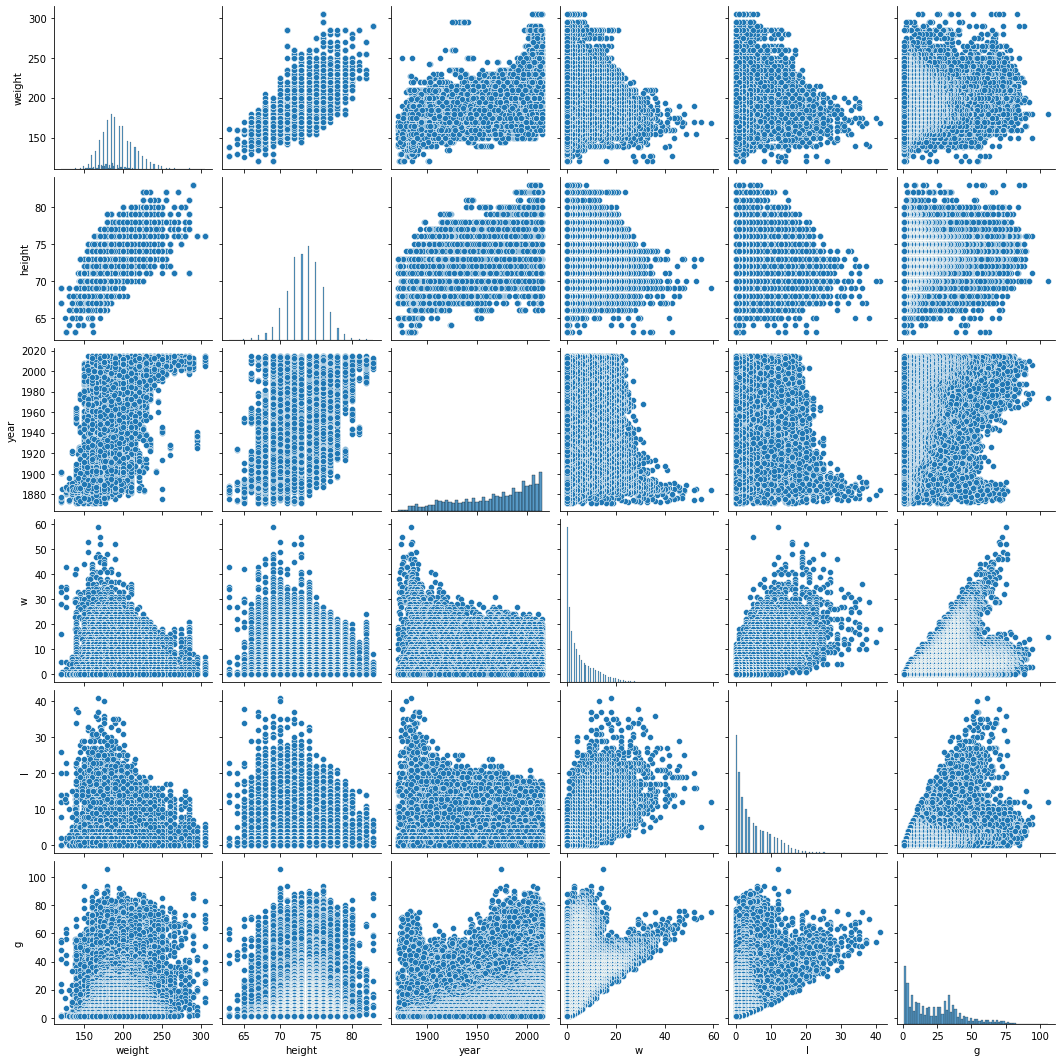

In [ ]:
fig = sns.pairplot(pitching_win)

In [ ]:
print(f'There are {len(pd.unique(player_pitching.team_id))} unique team_id identifiers in the data')
print(f'There are {len(pd.unique(player_pitching.player_id))} unique player_id identifiers in the data')
print(f'There are {len(pd.unique(player_pitching.name_given))} unique name_given identifiers in the data')
print(f'There are {len(pd.unique(player_pitching.birth_country ))} unique birth_country  identifiers in the data')

There are 149 unique team_id identifiers in the data
There are 9126 unique player_id identifiers in the data
There are 6800 unique name_given identifiers in the data
There are 9126 unique birth_country  identifiers in the data


**Batting**

In [ ]:
df_batting=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/batting.csv",
                 usecols=['player_id', 'team_id','ab','h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb'])
#df_batting=df_pitching.set_index('player_id')
df_batting

,player_id,team_id,ab,h,double,triple,hr,rbi,sb,cs,bb
0,abercda01,TRO,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,addybo01,RC1,118.0,32.0,6.0,0.0,0.0,13.0,8.0,1.0,4.0
2,allisar01,CL1,137.0,40.0,4.0,5.0,0.0,19.0,3.0,1.0,2.0
3,allisdo01,WS3,133.0,44.0,10.0,2.0,2.0,27.0,1.0,1.0,0.0
4,ansonca01,RC1,120.0,39.0,11.0,3.0,0.0,16.0,6.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
101327,zitoba01,OAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101328,zobribe01,OAK,235.0,63.0,20.0,2.0,6.0,33.0,1.0,1.0,33.0
101329,zobribe01,KCA,232.0,66.0,16.0,1.0,7.0,23.0,2.0,3.0,29.0
101330,zuninmi01,SEA,350.0,61.0,11.0,0.0,11.0,28.0,0.0,1.0,21.0


In [ ]:
player_batting = (df_batting.merge(df_team, on='team_id', how='inner'))
player_batting

,player_id,team_id,ab,h,double,triple,hr,rbi,sb,cs,bb,year,rank,g,w,l,r
0,abercda01,TRO,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1871,6,29,13,15,351
1,abercda01,TRO,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1872,5,25,15,10,273
2,beaveed01,TRO,15.0,6.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,1871,6,29,13,15,351
3,beaveed01,TRO,15.0,6.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,1872,5,25,15,10,273
4,bellast01,TRO,128.0,32.0,3.0,3.0,0.0,23.0,4.0,4.0,9.0,1871,6,29,13,15,351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967178,valdejo02,MIA,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,3,162,71,91,613
7967179,yelicch01,MIA,476.0,143.0,30.0,2.0,7.0,44.0,16.0,5.0,47.0,2012,5,162,69,93,609
7967180,yelicch01,MIA,476.0,143.0,30.0,2.0,7.0,44.0,16.0,5.0,47.0,2013,5,162,62,100,513
7967181,yelicch01,MIA,476.0,143.0,30.0,2.0,7.0,44.0,16.0,5.0,47.0,2014,4,162,77,85,645


In [ ]:
batting_win=player_batting.sort_values(['w','g'],ascending=False)
batting_win=batting_win.groupby(['team_id','player_id']).filter(lambda x: (x['w'].count() < 115) and (x['g'].count() < 160))
batting_win.head()

,player_id,team_id,ab,h,double,triple,hr,rbi,sb,cs,bb,year,rank,g,w,l,r
7750098,baezjo01,SEA,305.0,79.0,14.0,1.0,1.0,17.0,6.0,1.0,19.0,2001,1,162,116,46,927
7750176,braunst01,SEA,451.0,106.0,19.0,1.0,5.0,31.0,8.0,3.0,80.0,2001,1,162,116,46,927
7750215,burkest01,SEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,1,162,116,46,927
7750254,collida02,SEA,402.0,96.0,9.0,3.0,5.0,28.0,25.0,10.0,33.0,2001,1,162,116,46,927
7750371,delgapu01,SEA,22.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2001,1,162,116,46,927


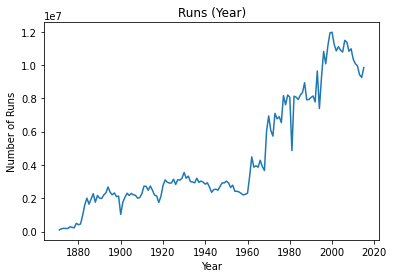

In [ ]:
homeruns = batting_win[['year', 'r']].copy()
hr_by_year = homeruns.groupby('year')['r'].sum()
hr_by_year.sort_index()
hr_by_year.plot();
plt.ylabel('Number of Runs')
plt.xlabel('Year')
plt.title('Runs (Year)');

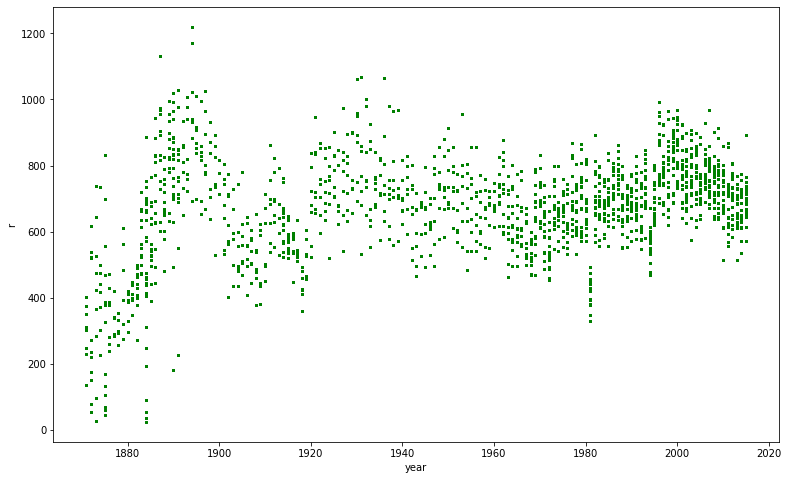

In [ ]:
batting_win.plot(kind='scatter', x='year', y='r', figsize=(13,8), s=2, c='green');

In [ ]:
combined_df = (batting_win.merge(pitching_win, on=['team_id','player_id','year','g','w','l'], how='inner'))
combined_df[['team_id','player_id','name_given','birth_country','weight', 'height','year','g','w','l']].head()

,team_id,player_id,name_given,birth_country,weight,height,year,g,w,l
0,SL3,bradlge01,George Washington,bradlge01,175.0,70.0,1876,64,45,19
1,LS1,devliji01,James Alexander,devliji01,175.0,71.0,1877,61,35,25
2,LS1,devliji01,James Alexander,devliji01,175.0,71.0,1877,61,35,25
3,PH1,mcbridi01,John Dickson,mcbridi01,150.0,69.0,1874,55,33,22
4,PH1,mcbridi01,John Dickson,mcbridi01,150.0,69.0,1874,55,33,22


In [ ]:
new_df = combined_df[['team_id','player_id','name_given','birth_country','weight', 'height','year','g','w','l']].copy()
new_df=new_df.sort_values('w',ascending=False)
new_df.head()

,team_id,player_id,name_given,birth_country,weight,height,year,g,w,l
0,SL3,bradlge01,George Washington,bradlge01,175.0,70.0,1876,64,45,19
2,LS1,devliji01,James Alexander,devliji01,175.0,71.0,1877,61,35,25
1,LS1,devliji01,James Alexander,devliji01,175.0,71.0,1877,61,35,25
3,PH1,mcbridi01,John Dickson,mcbridi01,150.0,69.0,1874,55,33,22
4,PH1,mcbridi01,John Dickson,mcbridi01,150.0,69.0,1874,55,33,22


In [ ]:
new_df.corr()

,weight,height,year,g,w,l
weight,1.000000,0.589423,0.869986,0.141121,0.084239,0.317932
height,0.589423,1.000000,0.609119,0.486932,0.435552,0.538401
year,0.869986,0.609119,1.000000,0.398059,0.309569,0.682986
g,0.141121,0.486932,0.398059,1.000000,0.989156,0.857679
w,0.084239,0.435552,0.309569,0.989156,1.000000,0.778803
l,0.317932,0.538401,0.682986,0.857679,0.778803,1.000000


In [ ]:
# read data
player = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/player.csv")
salary = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/salary.csv")
team =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/team.csv")
fielding = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/fielding.csv")
print(player.shape, salary.shape, team.shape)

(18846, 24) (25575, 5) (2805, 48)


In [ ]:
player.describe().columns

Index(['birth_year', 'birth_month', 'birth_day', 'death_year', 'death_month',
       'death_day', 'weight', 'height'],
      dtype='object')

In [ ]:
d = salary.groupby(["year","league_id"])
d = d.mean()
d.head()

salary
year league_id               
1985 AL         455597.016949
     NL         500249.317647
1986 AL         402337.867347
     NL         433925.069364
1987 AL         441846.581169

In [ ]:
d = d.unstack()
d.head()

salary               
league_id             AL             NL
year                                   
1985       455597.016949  500249.317647
1986       402337.867347  433925.069364
1987       441846.581169  427857.768025
1988       453901.190751  452374.170347
1989       502052.361702  511116.486567

**Salary**

In [ ]:
d['salary'].head()
salary.head()

Text(0.5, 1.0, 'Baseball player salary over years')

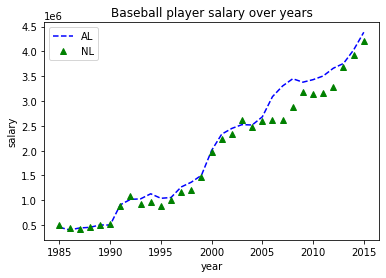

In [ ]:
# first, we focus on some general analysis
# salary between leagues and year
import warnings
warnings.filterwarnings('ignore')
data = salary.groupby(["year","league_id"])\
    .mean()\
    .unstack().copy(deep = True)
# see the salary trend
plt.plot(data["salary"]["AL"], 'b--', data["salary"]["NL"], 'g^')
plt.xlabel("year")
plt.ylabel("salary")
plt.legend(["AL","NL"], loc = "leftup")
plt.title("Baseball player salary over years")

In [ ]:
# Let's take a look at salary between teams
# Consider only recent years(after 2010)
import seaborn as sns
import matplotlib.patches as mpatches
data = salary[salary.year >= 2010].groupby("team_id").mean()["salary"]
print(type(data))
data = data.to_frame()
salary[salary.year >= 2010].mean()['salary']


<class 'pandas.core.series.Series'>


3671903.0878610383

In [ ]:
data["diff_salary"] = data["salary"] - salary[salary.year >= 2010].mean()["salary"]
data["team_id"] = data.index
data.head()

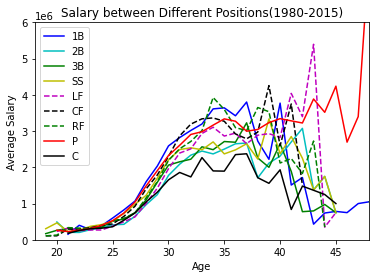

In [ ]:
# Salary between different positions and age

warnings.filterwarnings('ignore')
player_position = pd.merge(salary, fielding, on = ["player_id","year"])[["year", "player_id", "salary", "pos"]]
player_position = pd.merge(player_position, player, on = ["player_id"], how = "left")[["year", "player_id","salary", "pos", "birth_year"]]
player_position["age"] = player_position["year"] - player_position["birth_year"]
player_position = player_position[player_position.year >= 1980]
data = player_position.groupby(["age", "pos"]).mean()["salary"].unstack()
#plt.plot(data["1B"],  data["2B"], data["3B"], data["C"], data["CF"], data["LF"], data["P"], data["RF"], data["SS"])
plt.plot(data["1B"], 'b-', data["2B"], 'c-', data["3B"], 'g-', data["SS"], 'y-',data['LF'], 'm--', data['CF'], 'k--', data['RF'], 'g--', data['P'],'r-', data['C'],'k-')
_ = plt.xlabel("Age")
_ = plt.ylabel("Average Salary")
_ = plt.legend(["1B",'2B','3B','SS',"LF","CF","RF","P","C"], loc = 'leftup')
_ = plt.title("Salary between Different Positions(1980-2015)")
_ = plt.xlim([18,48])
_ = plt.ylim([0,6000000])

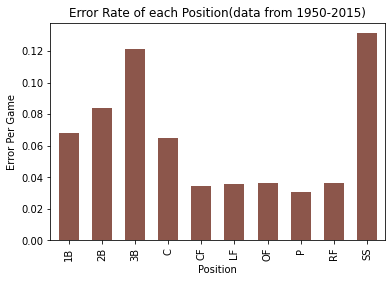

In [ ]:
# Is there a most error prone position?
data = fielding[fielding["year"] >= 1950][["year","team_id","player_id","pos", "g","e"]]
data = data[data["g"] != 0]
data.loc[:,"error/game"] = data["e"]/data["g"]
error_data = data.groupby("pos").mean()["error/game"]
error_data = error_data.to_frame()
error_data = error_data.drop("DH")
p1 = error_data["error/game"].plot.bar(figsize = (6,4), width = .6, color = sns.color_palette()[5])
_ = p1.set(title = "Error Rate of each Position(data from 1950-2015)")
_ = p1.set(xlabel = "Position", ylabel = "Error Per Game")
# We can see that the most error prone position is SS followed by 3B
# generally speacking, OF are less error prone

In [ ]:
# Are the best performers selected for all-star game?
# combine fielding and post-fielding (from 1933)
all_star = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/all_star.csv")[["player_id","year"]]
fielding = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/fielding.csv")
fielding_postseason = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/fielding_postseason.csv")
fielding = fielding[fielding["year"] >= 1933]
fielding_postseason = fielding_postseason[fielding_postseason["year"] >= 1933]
all_fielding = pd.concat([fielding, fielding_postseason], axis = 0)
all_fielding = all_fielding.groupby(["year","player_id"]).sum()[["g", "gs", "inn_outs", "po","a","e","dp","pb"]]
all_fielding = all_fielding.fillna(0)
all_fielding.head()

g   gs  inn_outs     po      a     e    dp   pb
year player_id                                                   
1933 adamssp01  148  0.0       0.0  132.0  311.0  18.0  19.0  0.0
     alexada01   79  0.0       0.0  728.0   47.0   6.0  51.0  0.0
     allenet01   67  0.0       0.0  179.0    8.0   3.0   1.0  0.0
     allenjo02   25  0.0       0.0   10.0   29.0   1.0   0.0  0.0
     almadme01   13  0.0       0.0   27.0    1.0   0.0   0.0  0.0

In [ ]:
# calculate fielding percentage: (Putouts + Assists) divided by (Putouts + Assists + Errors)
# po: Putouts / Pickoff ; a: Assist ; e: Error ; dp: Double Play; pb: Passed Balls
all_fielding["FP"] = (all_fielding["po"] + all_fielding["a"])/(all_fielding["po"] + all_fielding["a"] + all_fielding["e"])
all_fielding["FP"]

year  player_id
1933  adamssp01    0.960954
      alexada01    0.992318
      allenet01    0.984211
      allenjo02    0.975000
      almadme01    1.000000
                     ...   
2015  zimmery01    0.994865
      zitoba01     1.000000
      zobribe01    0.984683
      zuninmi01    0.994172
      zychto01     1.000000
Name: FP, Length: 69918, dtype: float64

In [ ]:
# we don't consider those who participated less than mean_game
mean_game = all_fielding["g"].mean()
all_fielding = all_fielding[all_fielding["g"] >= mean_game]
all_fielding.head()

g   gs  inn_outs     po      a     e     dp   pb        FP
year player_id                                                              
1933 adamssp01  148  0.0       0.0  132.0  311.0  18.0   19.0  0.0  0.960954
     alexada01   79  0.0       0.0  728.0   47.0   6.0   51.0  0.0  0.992318
     allenet01   67  0.0       0.0  179.0    8.0   3.0    1.0  0.0  0.984211
     applilu01  151  0.0       0.0  314.0  534.0  55.0  107.0  0.0  0.939092
     averiea01  149  0.0       0.0  390.0    8.0  12.0    3.0  0.0  0.970732

In [ ]:
# combine batting and batting_postseason
# ab: At Bats; bb: walk-to-strikeout ; double;  triple ; r : runs ; rbi :Run batted in　；
# h : hits ; hr : home run ; sb: Stolen bases; tb = 2*double + 3*triple + 4*home run
# g_idp : 	Double play ; cs : Caught Stealing
batting = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/batting.csv")
batting_postseason = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/batting_postseason.csv")
batting = batting[batting["year"] >= 1933]
batting_postseason = batting_postseason[batting_postseason["year"] >= 1933]
all_batting = pd.concat([batting, batting_postseason], axis = 0)
all_batting = all_batting.groupby(["year","player_id"]).sum()[["g","h", "double", "triple", "hr", "sb", "bb","ab","g_idp","cs"]]
all_batting = all_batting.fillna(0)
# Total Average = (h + double + 2*triple + 4*hr + sb + bb)/(ab - h + g_idp + cs)
all_batting["TA"] = (all_batting["h"] + all_batting["double"] + 2*all_batting["triple"] + 4*all_batting["hr"] + all_batting["sb"]+all_batting["bb"])/(all_batting["ab"]- all_batting["h"]+all_batting["g_idp"]+all_batting["cs"])
all_batting = all_batting[all_batting["g"] >= mean_game]
all_batting.head()

g      h  double  triple    hr   sb    bb     ab  g_idp  \
year player_id                                                              
1933 adamssp01  145  146.0    22.0     1.0   1.0  3.0  45.0  568.0   12.0   
     alexada01   94   88.0    14.0     1.0   5.0  0.0  25.0  313.0    0.0   
     allenet01   91   63.0     7.0     3.0   0.0  3.0  13.0  261.0    4.0   
     applilu01  151  197.0    36.0    10.0   6.0  6.0  56.0  612.0    0.0   
     averiea01  151  180.0    39.0    16.0  11.0  3.0  54.0  599.0    0.0   

                  cs        TA  
year player_id                  
1933 adamssp01   0.0  0.511521  
     alexada01   1.0  0.659292  
     allenet01   0.0  0.455446  
     applilu01  11.0  0.795775  
     averiea01   1.0  0.838095

In [ ]:
# combine pitching and pitching_postseason
pitching = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/pitching.csv")
pitching_postseason = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/pitching_postseason.csv")
pitching = pitching[pitching['year'] >= 1993]
pitching_postseason = pitching_postseason[pitching_postseason['year'] >= 1993]
all_pitching = pd.concat([pitching, pitching_postseason], axis = 0)
all_pitching.groupby(["year","player_id"])
all_pitching.head()

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp,round
28783,abbotji01,1993,1.0,NYA,AL,11,14,32,32,4,...,9.0,3.0,0.0,906.0,0.0,115,NaN,NaN,NaN,NaN
28784,abbotpa01,1993,1.0,CLE,AL,0,1,5,5,0,...,1.0,0.0,0.0,84.0,0.0,15,NaN,NaN,NaN,NaN
28785,agostju01,1993,1.0,HOU,NL,0,0,6,0,0,...,0.0,0.0,1.0,26.0,3.0,4,NaN,NaN,NaN,NaN
28786,aguilri01,1993,1.0,MIN,AL,4,3,65,0,0,...,1.0,1.0,0.0,287.0,61.0,25,NaN,NaN,NaN,NaN
28787,aldresc01,1993,2.0,MON,NL,1,0,3,0,0,...,1.0,0.0,0.0,25.0,1.0,4,NaN,NaN,NaN,NaN


In [ ]:
# combine fielding percentage and batting average to determine the performance of a player
data1 = all_fielding["FP"]
data2 = all_batting["TA"]
data1 = data1.reset_index(level = ['year','player_id'])
data2 = data2.reset_index(level = ['year','player_id'])
data = pd.merge(data1, data2, on =['year','player_id'], how = 'inner')
data["Score"] = data['FP'] + data['TA']
data["Score"]

0        1.472475
1        1.651610
2        1.439656
3        1.734867
4        1.808827
           ...   
22464    1.771514
22465         NaN
22466    1.767759
22467    1.818854
22468    1.457010
Name: Score, Length: 22469, dtype: float64

In [ ]:
# Do players with a high ground into double play (GIDP) have a lower batting average?
# batting average = h/ab
warnings.filterwarnings('ignore')
batting = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/batting.csv")
batting_postseason = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 641/Project_File/batting_postseason.csv")
all_batting = pd.concat([batting, all_batting], axis = 0)
all_batting = all_batting.groupby(["year","player_id"]).sum()[["ab", "h", "g_idp"]]
all_batting = all_batting[np.isfinite(all_batting['g_idp'])]
all_batting = all_batting[(all_batting["ab"] != 0) & (all_batting["g_idp"]!= 0)]
all_batting["batting_average"] = all_batting["h"]/all_batting["ab"]

from sklearn.linear_model import LinearRegression

algorithm = LinearRegression()
predictors = ["g_idp"]

#Initiate our algorithm class
algorithm = LinearRegression()
predictors = all_batting[predictors]
# The target we're using to train the algorithm.
target = all_batting["batting_average"]
# Training the algorithm using the predictors and target.
algorithm.fit(predictors, target)
print('Coefficients: \n', algorithm.coef_)
# From regression, we can see that the coefficient is not negative, thus the assumption is not appropriate

Coefficients: 
 [0.0053944]


Text(0.5, 1.0, "Players' G_IDP vs Batting Average")

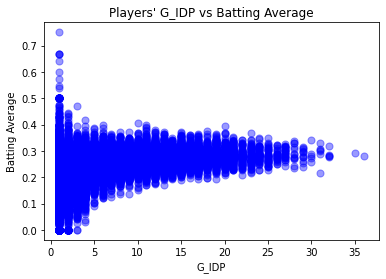

In [ ]:
# Let's draw the scatter plot
s = 100
plt.scatter(predictors, target, color='b', s=s/2, alpha=.4)
plt.xlabel("G_IDP")
plt.ylabel("Batting Average")
plt.title("Players' G_IDP vs Batting Average")
# from the plot, there is no evidence that high g_idp will cause low batting average.
# However, the std of batting average decreases as G_IDP increases

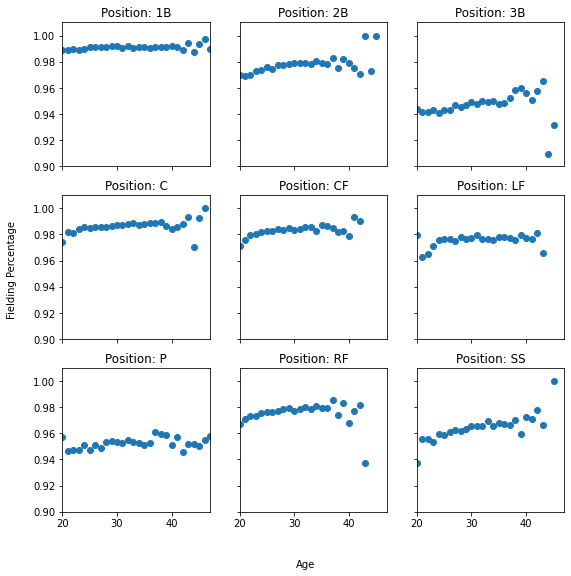

In [ ]:
# 1. Consider Fielding Percentage
all_fielding = pd.concat([fielding, fielding_postseason], axis = 0)
all_fielding = pd.merge(all_fielding, player, on = ["player_id"], how = "left")[["year","g","player_id","birth_year","pos", "po","a","e"]]
all_fielding["age"] = all_fielding['year'] - all_fielding['birth_year']
all_fielding["FP"] = (all_fielding["po"] + all_fielding["a"])/(all_fielding["po"] + all_fielding["a"] + all_fielding["e"])
all_fielding = all_fielding[all_fielding["g"]>= 10]
all_fielding = all_fielding.groupby(["pos", "age"]).mean()[["FP"]]
all_fielding = all_fielding.reset_index(level=['pos', 'age'])
positions = ['1B', '2B', '3B', 'C', 'CF', 'LF', 'P', 'RF', 'SS']

fig, axes = plt.subplots(nrows=3, ncols=3, sharex = True, sharey = True, figsize=(9, 9))
fig.text(0.5, 0.04, 'Age', ha='center')
fig.text(0.04, 0.5, 'Fielding Percentage', va='center', rotation='vertical')
axes = axes.ravel()
for i in range(9):
    data = all_fielding[all_fielding["pos"] == positions[i]]
    axes[i].scatter(data["age"], data["FP"], color = sns.color_palette()[0])
    axes[i].set_xlim(20,47)
    axes[i].set_ylim(0.90, 1.01)
    axes[i].set_title("Position: " + positions[i])